In [746]:
import pandas as pd
import numpy as np
import string as str

df = pd.read_csv('/Users/tylerlee/Documents/FDB/100k_of_med_devices_randseed_0.5.csv')

In [747]:
df.info()
#gather info on the dataset gathered randomly out of 1.3 million rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
lbld_med_device_id                  100000 non-null int64
labeler_name                        100000 non-null object
gudid_brand_name                    88264 non-null object
gudid_version_model_number          92894 non-null object
brand_name                          32401 non-null object
version_number                      0 non-null float64
model_number                        12566 non-null object
standard_device_name                100000 non-null object
enhanced_device_name                100000 non-null object
add_date                            100000 non-null object
end_date                            137 non-null object
status                              100000 non-null object
gudid_description                   70802 non-null object
latex_code                          100000 non-null int64
lot_number_control_code             100000 non-null int64
serial_number_contro

In [748]:
df = df.drop(['version_number', 'base_package_type', 'hbic'], axis=1)
#drop useless columns 

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
lbld_med_device_id                  100000 non-null int64
labeler_name                        100000 non-null object
gudid_brand_name                    88264 non-null object
gudid_version_model_number          92894 non-null object
brand_name                          32401 non-null object
model_number                        12566 non-null object
standard_device_name                100000 non-null object
enhanced_device_name                100000 non-null object
add_date                            100000 non-null object
end_date                            137 non-null object
status                              100000 non-null object
gudid_description                   70802 non-null object
latex_code                          100000 non-null int64
lot_number_control_code             100000 non-null int64
serial_number_control_code          100000 non-null int64
expiration_date_c

In [750]:
#expande the head view to see the entire columns contents to see what I'm up against
pd.set_option('display.max_colwidth', -1)
df.head()

,lbld_med_device_id,labeler_name,gudid_brand_name,gudid_version_model_number,brand_name,model_number,standard_device_name,enhanced_device_name,add_date,end_date,...,enhanced_device_name_long,device_categories,prod_codes,catalog_numbers,external_identifiers,gtin,sizings,commercial_distribution_end_date,unspsc19_reviewed_code,random_id
0,344553,"Megagen Implant Co., Ltd.",Stopper Drill,SD4211M,NaN,NaN,Fixture/appliance dental drill,Megagen Fixture/appliance dental drill,2017-01-05,NaN,...,Megagen Fixture/appliance dental drill,"[{""category_name"": ""Dental"", ""category_type"": ""FDB Cloud Connector""}, {""category_name"": ""Dental"", ""category_type"": ""Family""}, {""category_name"": ""Dental"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Dental"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Dental"", ""category_type"": ""FDB Cloud Connector""}, {""category_name"": ""Dental"", ""category_type"": ""Family""}, {""category_name"": ""Dental"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Dental"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Surgical instruments/systems"", ""category_type"": ""Family""}, {""category_name"": ""Surgical power tool systems"", ""category_type"": ""Family""}, {""category_name"": ""Osteotomes"", ""category_type"": ""Family""}, {""category_name"": ""Fixture/appliance dental drill"", ""category_type"": ""Device""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v18.0801""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v18.0801""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v18.0801""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Dental drills"", ""category_type"": ""UNSPSC English v20.0601""}]","[{""product_code"": ""NDP"", ""product_code_name"": ""Accessories, Implant, Dental, Endosseous""}]","[{""labeler"": null, ""catalog_no"": ""SD4211M"", ""lbld_no_code"": -1, ""transactional_no_code"": -1}]","[{""designator"": ""Primary"", ""external_device_id"": ""08806388234844"", ""external_device_type"": ""GTIN"", ""lbld_med_device_identifier_id"": 2089242}]",8.806388e+12,[],NaN,-1,0.798513
1,345740,Terumo Cardiovascular Systems Corp.,Cardiovascular Procedure Kit,71064,NaN,NaN,Cardiopulmonary bypass system tubing set,Terumo Cardiopulmonary bypass system tubing set,2017-01-05,NaN,...,Terumo Cardiopulmonary bypass system tubing set,"[{""category_name"": ""Surgical Instruments"", ""category_type"": ""FDB Cloud Connector""}, {""category_name"": ""Clamps"", ""category_type"": ""Family""}, {""category_name"": ""Clamps"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Clamps"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Filters"", ""category_type"": ""Family""}, {""category_name"": ""Filters"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Filters"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Pumps"", ""category_type"": ""Family""}, {""category_name"": ""Pumps"", ""category_type"": ""UNSPSC English v19.0501""}, {""category_name"": ""Pumps"", ""category_type"": ""UNSPSC English v20.0601""}, {""category_name"": ""Tubes/Tubing"", ""category_type"": ""Family""}, {""category_name"": ""Cardiopulmonary bypass systems"", ""category_type"": ""Family""}, {""category_name"": ""Perfusion pump pack tubing"", ""category_type"": ""UNSPSC English v18.0801""}, {""category_name"": ""Perfusion pump pack tubing"", ""category_type"":

In [751]:
import json 
from pandas.io.json import json_normalize #package for flattening json in pandas df
#df = json_normalize?

In [752]:
# found useful code for flattening json: https://stackoverflow.com/questions/39899005/how-to-flatten-a-pandas-dataframe-with-some-columns-as-json
import ast
from pandas.io.json import json_normalize

def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [753]:
#this is a part of the json flattening code which targets the columns
df3 = json_normalize(df['device_categories'].apply(list_of_dicts).tolist()).add_prefix('device_categories.')

In [754]:
#checking out the flatten Json
df3.head(5)

,device_categories.Device,device_categories.FDB Cloud Connector,device_categories.Family,device_categories.UNSPSC English v18.0801,device_categories.UNSPSC English v19.0501,device_categories.UNSPSC English v20.0601
0,Fixture/appliance dental drill,Dental,Osteotomes,Dental drills,Dental drills,Dental drills
1,Cardiopulmonary bypass system tubing set,Surgical Instruments,Cardiopulmonary bypass systems,Perfusion pump pack tubing,Perfusion pump pack tubing,Perfusion pump pack tubing
2,Cardiopulmonary bypass system tubing set,Surgical Instruments,Cardiopulmonary bypass systems,Perfusion pump pack tubing,Perfusion pump pack tubing,Perfusion pump pack tubing
3,Basic tracheostomy tube,Anesthesia/Respiratory Devices,Tracheostomy tubes,Tracheostomy tubes,Tracheostomy tubes,Tracheostomy tubes
4,Basic tracheostomy tube,Anesthesia/Respiratory Devices,Tracheostomy tubes,Tracheostomy tubes,Tracheostomy tubes,Tracheostomy tubes


In [755]:
df = df.reset_index()
#set indext to merge the two dataframes

In [756]:
df3 = df3.reset_index()

In [757]:
df4 = pd.merge(df, df3, on='index')

In [758]:
#checking out all the columns using the head transpose
df4.head().T

,0,1,2,3,4
index,0,1,2,3,4
lbld_med_device_id,344553,345740,346824,347956,348903
labeler_name,"Megagen Implant Co., Ltd.",Terumo Cardiovascular Systems Corp.,Terumo Cardiovascular Systems Corp.,"Smiths Medical ASD, Inc.","Smiths Medical ASD, Inc."
gudid_brand_name,Stopper Drill,Cardiovascular Procedure Kit,Cardiovascular Procedure Kit,Bivona,Bivona
gudid_version_model_number,SD4211M,71064,71733-02,XT14CS50NSC201N,SU12EN50NNC041N
brand_name,NaN,NaN,NaN,NaN,NaN
model_number,NaN,NaN,NaN,NaN,NaN
standard_device_name,Fixture/appliance dental drill,Cardiopulmonary bypass system tubing set,Cardiopulmonary bypass system tubing set,Basic tracheostomy tube,Basic tracheostomy tube
enhanced_device_name,Megagen Fixture/appliance dental drill,Terumo Cardiopulmonary bypass system tubing set,Terumo Cardiopulmonary bypass system tubing set,Smiths Medical Basic tracheostomy tube,Smiths Medical Basic tracheostomy tube
add_date,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05


In [759]:
#drop useless or duplicate columns
df5 = df4.drop(['device_categories','device_categories','device_categories.UNSPSC English v19.0501','device_categories.UNSPSC English v18.0801','catalog_numbers','sizings','prod_codes','commercial_distribution_end_date','unspsc19_reviewed_code','random_id','external_identifiers'], axis=1)

In [760]:
df5.head().T

,0,1,2,3,4
index,0,1,2,3,4
lbld_med_device_id,344553,345740,346824,347956,348903
labeler_name,"Megagen Implant Co., Ltd.",Terumo Cardiovascular Systems Corp.,Terumo Cardiovascular Systems Corp.,"Smiths Medical ASD, Inc.","Smiths Medical ASD, Inc."
gudid_brand_name,Stopper Drill,Cardiovascular Procedure Kit,Cardiovascular Procedure Kit,Bivona,Bivona
gudid_version_model_number,SD4211M,71064,71733-02,XT14CS50NSC201N,SU12EN50NNC041N
brand_name,NaN,NaN,NaN,NaN,NaN
model_number,NaN,NaN,NaN,NaN,NaN
standard_device_name,Fixture/appliance dental drill,Cardiopulmonary bypass system tubing set,Cardiopulmonary bypass system tubing set,Basic tracheostomy tube,Basic tracheostomy tube
enhanced_device_name,Megagen Fixture/appliance dental drill,Terumo Cardiopulmonary bypass system tubing set,Terumo Cardiopulmonary bypass system tubing set,Smiths Medical Basic tracheostomy tube,Smiths Medical Basic tracheostomy tube
add_date,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05


In [761]:
#create a dataframe with only the useful columns after some reviewing
df6 = df5[['lbld_med_device_id','labeler_name','gudid_brand_name','standard_device_name','device_categories.FDB Cloud Connector','device_categories.Family','device_categories.UNSPSC English v20.0601']].copy()

In [968]:
df6.head().T

,0,1,2,3,4
lbld_med_device_id,344553,345740,346824,347956,348903
labeler_name,"Megagen Implant Co., Ltd.",Terumo Cardiovascular Systems Corp.,Terumo Cardiovascular Systems Corp.,"Smiths Medical ASD, Inc.","Smiths Medical ASD, Inc."
gudid_brand_name,Stopper Drill,Cardiovascular Procedure Kit,Cardiovascular Procedure Kit,Bivona,Bivona
standard_device_name,Fixture/appliance dental drill,Cardiopulmonary bypass system tubing set,Cardiopulmonary bypass system tubing set,Basic tracheostomy tube,Basic tracheostomy tube
device_categories.FDB Cloud Connector,Dental,Surgical Instruments,Surgical Instruments,Anesthesia/Respiratory Devices,Anesthesia/Respiratory Devices
device_categories.Family,Osteotomes,Cardiopulmonary bypass systems,Cardiopulmonary bypass systems,Tracheostomy tubes,Tracheostomy tubes
device_categories.UNSPSC English v20.0601,Dental drills,Perfusion pump pack tubing,Perfusion pump pack tubing,Tracheostomy tubes,Tracheostomy tubes


In [763]:
# part for assembling the relevant columns into one column to set up for a countvectorize corpus
#labeler_name	gudid_brand_name	standard_device_name	device_categories.FDB Cloud Connector	device_categories.Family
df7 = df6.labeler_name +' '+ df6.gudid_brand_name +' '+ df6.standard_device_name +' '+ df6['device_categories.FDB Cloud Connector'] +' '+ df6['device_categories.Family']

In [764]:
df8 = pd.DataFrame(df7,columns=['full_description'])
df8 = df8.reset_index()

In [765]:
df9 = df6[['device_categories.UNSPSC English v20.0601']]
df9 = df9.reset_index()

In [766]:
#merge the two dataframes for the catagories I'm using and the full description
df10 = pd.merge(df8, df9, on='index')

In [767]:
#get rid of useless index
df10 = df10.drop([ 'index'], axis = 1)

In [768]:
#rename column without spaces to make it easier to manipulate
df10 = df10.rename(columns={'device_categories.UNSPSC English v20.0601': 'device_categories'})

In [769]:
#drop columns with empty description 
df11 = df10.dropna()

df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88218 entries, 0 to 99999
Data columns (total 2 columns):
full_description     88218 non-null object
device_categories    88218 non-null object
dtypes: object(2)
memory usage: 2.0+ MB


In [770]:
#change columns to strings and make everything lowercase

df11 = df11.astype('str') 

df11['full_description'] = df11['full_description'].apply(lambda x: x.lower())
df11['device_categories'] = df11['device_categories'].apply(lambda x: x.lower())

In [771]:
df11.head()

,full_description,device_categories
0,"megagen implant co., ltd. stopper drill fixture/appliance dental drill dental osteotomes",dental drills
1,terumo cardiovascular systems corp. cardiovascular procedure kit cardiopulmonary bypass system tubing set surgical instruments cardiopulmonary bypass systems,perfusion pump pack tubing
2,terumo cardiovascular systems corp. cardiovascular procedure kit cardiopulmonary bypass system tubing set surgical instruments cardiopulmonary bypass systems,perfusion pump pack tubing
3,"smiths medical asd, inc. bivona basic tracheostomy tube anesthesia/respiratory devices tracheostomy tubes",tracheostomy tubes
4,"smiths medical asd, inc. bivona basic tracheostomy tube anesthesia/respiratory devices tracheostomy tubes",tracheostomy tubes


In [772]:
#get rid of punctuation

import string

df11['full_description'] = df11['full_description'].str.replace('[{}]'.format(string.punctuation), ' ')

In [773]:
df11.head()

,full_description,device_categories
0,megagen implant co ltd stopper drill fixture appliance dental drill dental osteotomes,dental drills
1,terumo cardiovascular systems corp cardiovascular procedure kit cardiopulmonary bypass system tubing set surgical instruments cardiopulmonary bypass systems,perfusion pump pack tubing
2,terumo cardiovascular systems corp cardiovascular procedure kit cardiopulmonary bypass system tubing set surgical instruments cardiopulmonary bypass systems,perfusion pump pack tubing
3,smiths medical asd inc bivona basic tracheostomy tube anesthesia respiratory devices tracheostomy tubes,tracheostomy tubes
4,smiths medical asd inc bivona basic tracheostomy tube anesthesia respiratory devices tracheostomy tubes,tracheostomy tubes


In [774]:
df11.describe()

,full_description,device_categories
count,88218,88218
unique,29370,1152
top,medline industries inc medline industries inc general surgical procedure kit surgical instruments surgical instruments systems,spinal screws
freq,2239,11402


In [775]:
df11.groupby('device_categories').describe()

full_description  \
                                                                                                   count   
device_categories                                                                                          
absorber units for gas anesthesia apparatus or machines                                  1                 
acetabular augments                                                                      2                 
acetabular cages                                                                         16                
acetabular cup liners                                                                    530               
acetabular cup shells                                                                    326               
acetabular cups                                                                          43                
acetabular rings                                                                         2                 
acetabular screws                                                                        7                 
acupuncture needles                                                                      96                
acute care fetal or maternal monitoring unit accessories                                 16                
acute care fetal or maternal monitoring units                                            37                
acute care monitoring units and related products                                         2                 
adhesive dry bandages                                                                    3                 
adhesives                                                                                20                
aids for medical training                                                                1                 
airway clearance vests                                                                   36                
airway monitoring systems                                                                3                 
alarm systems                                                                            1                 
alginate dressings                                                                       5                 
alternating pressure systems                                                             7                 
amniocentesis kits                                                                       2                 
anal or rectal exam speculas                                                             1                 
anastomosis rings                                                                        1                 
anatomical human models for medical education or training                                14                
anchors                                                                                  192               
anesthesia breathing circuit accessories                                                 14                
anesthesia breathing circuits                                                            42                
anesthesia inhaler or inhaler unit accessories                                           1                 
anesthesia inhalers or inhaler units                                                     2                 
anesthesia needles                                                                       52                
...                                                                                     ..                 
vacuum blood collection tubes or containers                                              36                
vacuum or centrifugal concentrators                                                      5                 
vaginal exam speculas                                                                    11                
valves                                                                                   485

In [959]:
df12 = df11.groupby('device_categories').count()
df12.head(25)
#count the categories for graphing

,full_description
device_categories,
absorber units for gas anesthesia apparatus or machines,1
acetabular augments,2
acetabular cages,16
acetabular cup liners,530
acetabular cup shells,326
acetabular cups,43
acetabular rings,2
acetabular screws,7
acupuncture needles,96


In [960]:
import seaborn as sns

%matplotlib inline
import seaborn as sns

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


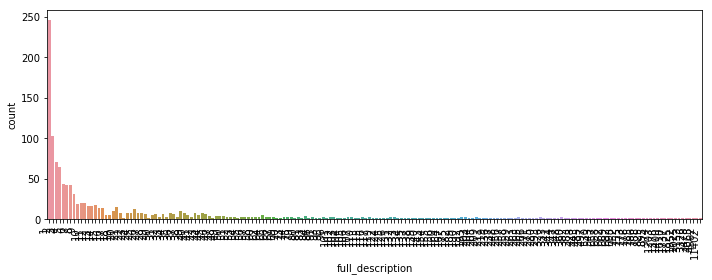

In [966]:
#theres a lot of categories that are unique... 
plt.figure(figsize=(10,4))
sns.countplot(df12['full_description'])
ds = pd.Series({"Column" : df12['full_description']})
ax = sns.countplot(x="Column", data=ds)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

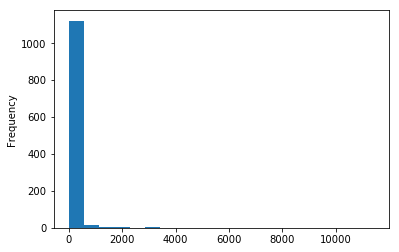

In [779]:
df12.full_description.plot(bins=20, kind='hist')

In [780]:
df12.full_description.describe()

count    1152.000000 
mean     76.578125   
std      447.835599  
min      1.000000    
25%      2.000000    
50%      7.000000    
75%      28.000000   
max      11402.000000
Name: full_description, dtype: float64

In [781]:
#alrighty finally starting the data science part

import sklearn

from sklearn.feature_extraction.text import CountVectorizer

In [782]:
#sdf13 = CountVectorizer(df11['full_description'].tolist())

In [783]:
#sdf13.fit(df11['full_description'])

In [784]:
descrip3 = df11['full_description'][3]

In [785]:
print(descrip3)

smiths medical asd  inc  bivona basic tracheostomy tube anesthesia respiratory devices tracheostomy tubes


In [786]:
 def text_process(corp):
    
    return [word for word in corp.split() if word.lower()]

In [787]:
#i'm not really sure what this does ask daniel...
#messages_bow = bow_transformer.transform(messages['message'])


bow_holder = CountVectorizer(analyzer=text_process)


df14 = bow_holder

#dftest = bow_holder.transform(df11['full_description'].tolist())

In [788]:
df11['full_description'].head(5).apply(text_process)

0    [megagen, implant, co, ltd, stopper, drill, fixture, appliance, dental, drill, dental, osteotomes]                                                                            
1    [terumo, cardiovascular, systems, corp, cardiovascular, procedure, kit, cardiopulmonary, bypass, system, tubing, set, surgical, instruments, cardiopulmonary, bypass, systems]
2    [terumo, cardiovascular, systems, corp, cardiovascular, procedure, kit, cardiopulmonary, bypass, system, tubing, set, surgical, instruments, cardiopulmonary, bypass, systems]
3    [smiths, medical, asd, inc, bivona, basic, tracheostomy, tube, anesthesia, respiratory, devices, tracheostomy, tubes]                                                         
4    [smiths, medical, asd, inc, bivona, basic, tracheostomy, tube, anesthesia, respiratory, devices, tracheostomy, tubes]                                                         
Name: full_description, dtype: object

In [789]:
bow_holder.fit(df11['full_description'])

CountVectorizer(analyzer=<function text_process at 0x1ac68fa730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [790]:
descript3 = df11['full_description'][2]

In [791]:
#bow4 = bow_transformer.transform([message4])
bow3 = bow_holder.transform([descript3])
print(bow3)

  (0, 3262)	2
  (0, 3492)	2
  (0, 3500)	2
  (0, 4441)	1
  (0, 8288)	1
  (0, 8835)	1
  (0, 12698)	1
  (0, 14186)	1
  (0, 15388)	1
  (0, 15542)	1
  (0, 15554)	2
  (0, 15851)	1
  (0, 16504)	1


In [792]:
messages_bow = bow_holder.transform(df11['full_description'])

In [793]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz /
                             (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (88218, 17904)
Amount of Non-Zero occurences:  1079526
sparsity: 0.07%


In [794]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [795]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [796]:
print (messages_tfidf.shape)

(88218, 17904)


In [797]:
from sklearn.ensemble import RandomForestClassifier

In [798]:
#cls = RandomForestClassifier()
device_classifier_model = RandomForestClassifier().fit(messages_tfidf,df11['device_categories'])

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [799]:
tfidf3 = tfidf_transformer.transform(bow3)

In [800]:
print ('Predicted: ',device_classifier_model.predict(tfidf3)[0] )
print ('Expected: ',df11['device_categories'][2])

Predicted:  perfusion pump pack tubing
Expected:  perfusion pump pack tubing


In [801]:
all_predictions = device_classifier_model.predict(messages_tfidf)

In [802]:
from sklearn.metrics import classification_report
print (classification_report(df11['device_categories'], all_predictions))

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                                                                                                           precision    recall  f1-score   support

                                                                  absorber units for gas anesthesia apparatus or machines       1.00      1.00      1.00         1
                                                                                                      acetabular augments       1.00      0.50      0.67         2
                                                                                                         acetabular cages       0.94      1.00      0.97        16
                                                                                                    acetabular cup liners       1.00      1.00      1.00       530
                                                                                                    acetabular cup shells       1.00      1.00      1.00       326
                     

In [803]:
from sklearn.model_selection import train_test_split

desc_train, desc_test, cata_train, cata_test= \
train_test_split(df11['full_description'], df11['device_categories'], test_size=0.2, random_state=2)

desc_train, desc_val, cata_train, cata_val = train_test_split(desc_train, cata_train, test_size=0.2, random_state=1)

print (len(desc_train), len(desc_test), len(desc_val), len(desc_train) + len(desc_test) + len(desc_val)) 

56459 17644 14115 88218


In [804]:
from sklearn.pipeline import Pipeline

In [805]:
#pipeline for Random forest model

pipelinerf = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',RandomForestClassifier())])

In [806]:
pipelinerf.fit(desc_train,cata_train)

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1ac68fa730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [807]:
predictions_testrf = pipelinerf.predict(desc_test)

In [808]:
print (classification_report(predictions_testrf,cata_test))

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                                                                                                           precision    recall  f1-score   support

                                                                                                         acetabular cages       0.33      1.00      0.50         2
                                                                                                    acetabular cup liners       1.00      0.98      0.99       105
                                                                                                    acetabular cup shells       0.89      0.88      0.89        76
                                                                                                          acetabular cups       0.83      1.00      0.91         5
                                                                                                         acetabular rings       0.00      0.00      0.00         1
                     

In [809]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

precision_score(cata_test, predictions_testrf, average='macro') 

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.729513263886719

In [810]:
#Naive Bayes model test

from sklearn.naive_bayes import MultinomialNB

In [811]:
pipelinenb = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [812]:
desc_train.shape

(56459,)

In [813]:
pipelinenb.fit(desc_train,cata_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1ac68fa730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [814]:
predictions_testnb = pipelinenb.predict(desc_test)

In [815]:
print (classification_report(predictions_testnb,cata_test))

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                                                                                                           precision    recall  f1-score   support

                                                                                                         acetabular cages       0.00      0.00      0.00         0
                                                                                                    acetabular cup liners       1.00      0.92      0.96       112
                                                                                                    acetabular cup shells       0.56      1.00      0.72        42
                                                                                                          acetabular cups       0.00      0.00      0.00         0
                                                                                                        acetabular screws       0.00      0.00      0.00         0
                     

In [816]:
#Random forest model confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [817]:
%matplotlib inline
import seaborn as sns

In [818]:
rf_val_predictions = pipelinerf.predict(desc_val)

print ('confusion matrix\n', confusion_matrix(cata_val, rf_val_predictions))

confusion matrix
 [[83  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  7]]


In [819]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import roc_auc_score

In [820]:
#n_classes = df11['device_categories'].nunique()

n_classes = cata_test.nunique()

print (n_classes)

792


In [821]:
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def multiclass_roc_curve(y_test, y_pred):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_curve(y_test, y_pred)

# credited source https://www.researchgate.net/post/How_to_draw_ROC_curves_for_multi-class_classification_problems

In [822]:
probs = pipelinerf.predict(desc_test)
multiclass_auc = multiclass_roc_auc_score(cata_test, probs)

print(multiclass_auc)

0.8687208157828543


In [823]:
#probs = pipelinerf.predict_proba(desc_test)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate AUC

print('AUC: %.3f' % multiclass_auc)
# calculate roc curve
#fpr, tpr, thresholds = multiclass_roc_curve(cata_test, probs)
#fpr, tpr, thresholds = roc_curve(cata_test, multiclass_auc)
# plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#pyplot.plot(fpr, tpr, marker='.')
# show the plot
#pyplot.show()

AUC: 0.869


In [824]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  

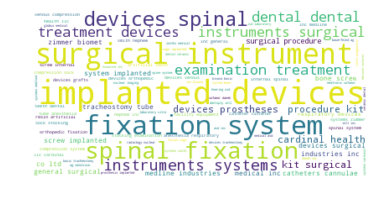

In [825]:
text = ' '.join(df11['full_description'].tolist())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

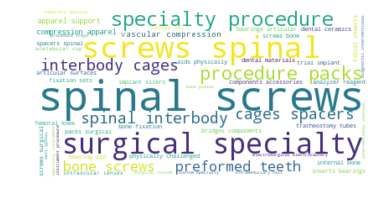

In [826]:
text = ' '.join(df11['device_categories'].tolist())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1002]:
df12 = df12.rename(columns={'full_description': 'number_of_unique'})
df12.sort_values(by='number_of_unique', ascending=False)

,number_of_unique
device_categories,
spinal screws,11402
surgical specialty procedure packs,4562
spinal interbody cages or spacers,4068
preformed teeth,3478
bone screws,3326
vascular or compression apparel or support,3153
tracheostomy tubes,2025
sutures,1952
internal bone fixation sets,1825


In [1006]:
df12.describe()

,number_of_unique
count,1152.000000
mean,76.578125
std,447.835599
min,1.000000
25%,2.000000
50%,7.000000
75%,28.000000
max,11402.000000


In [828]:
df14 = pd.merge(df12, df11, on='device_categories')

In [829]:
df14.head()


,device_categories,number_of_unique,full_description
0,absorber units for gas anesthesia apparatus or machines,1,drägerwerk ag co kgaa infinity id clic absorber free carbon dioxide absorber anesthesia respiratory devices anesthesia systems
1,acetabular augments,2,zimmer biomet trabecular metal™ acetabular augment implanted devices prostheses
2,acetabular augments,2,zimmer biomet trabecular metal™ metallic acetabulum prosthesis implanted devices prostheses
3,acetabular cages,16,microport orthopedics inc dynasty bf shell primary group k implanted devices prostheses
4,acetabular cages,16,microport orthopedics inc lineage acetabular shell quad hemi flare standard implanted devices prostheses


In [830]:
df14.shape

(88218, 3)

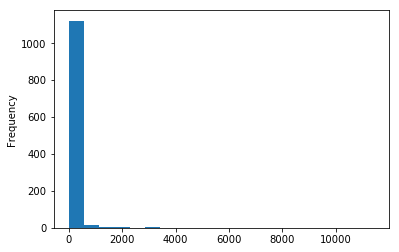

In [831]:
df12.number_of_unique.plot(bins=20, kind='hist')

In [855]:
mask = df14['number_of_unique'] > 1

df15 = df14[mask]

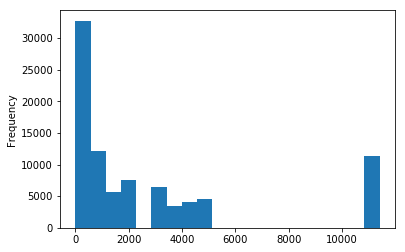

In [856]:
df15.number_of_unique.plot(bins=20, kind='hist')

In [857]:


from sklearn.model_selection import train_test_split

desc_train2, desc_test2, cata_train2, cata_test2= \
train_test_split(df15[['full_description','number_of_unique']], df15[['device_categories','number_of_unique']], test_size=0.2, random_state=2)

desc_train2, desc_val2, cata_train2, cata_val2 = train_test_split(desc_train2, cata_train2, test_size=0.2, random_state=2)

print (len(desc_train2), len(desc_test2), len(desc_val2), len(desc_train2) + len(desc_test2) + len(desc_val2)) 

56301 17595 14076 87972


In [858]:
pipelinerf2 = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',RandomForestClassifier())])

In [859]:
#desc_train2.head()
desc_train2m = desc_train2[desc_train2['number_of_unique'] > 0]

cata_train2m = cata_train2[cata_train2['number_of_unique'] > 0]

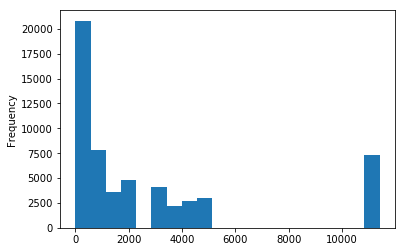

In [860]:
desc_train2m.number_of_unique.plot(bins=20, kind='hist')

In [861]:
desc_train2m = desc_train2m['full_description']

cata_train2m = cata_train2m['device_categories']

In [862]:
desc_train2m.shape

(56301,)

In [863]:
cata_train2m.shape

(56301,)

In [864]:
pipelinerf2.fit(desc_train2m,cata_train2m)

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1ac68fa730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [865]:
desc_test2 = desc_test2['full_description']

cata_test2 = cata_test2['device_categories']

In [866]:
predictions_testrf2 = pipelinerf2.predict(desc_test2)

In [867]:
print (classification_report(predictions_testrf2,cata_test2))

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                                                                                                           precision    recall  f1-score   support

                                                                                                      acetabular augments       0.00      0.00      0.00         0
                                                                                                         acetabular cages       0.75      0.50      0.60         6
                                                                                                    acetabular cup liners       1.00      0.95      0.98       129
                                                                                                    acetabular cup shells       0.90      0.92      0.91        62
                                                                                                          acetabular cups       0.50      0.50      0.50         6
                     

In [868]:
probs2 = pipelinerf2.predict(desc_test)
multiclass_auc2 = multiclass_roc_auc_score(cata_test, probs2)

print(multiclass_auc2)

0.9248916536375904


In [869]:
from sklearn.metrics import precision_score

precision_score(cata_test, probs2, average='macro') 

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8422697590182774

In [847]:
df14.shape

(88218, 3)

In [848]:
df16 = df14.drop_duplicates()

In [849]:
df16.shape

(29483, 3)

In [850]:
from sklearn.model_selection import train_test_split

/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylerlee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tylerlee/anac

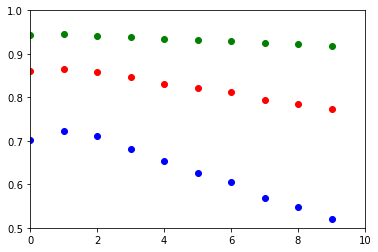

In [851]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, .5, 1])

for i in range(10):
    
    #create the dataframe based on the i

    desc_train3, desc_test3, cata_train3, cata_test3= \
    train_test_split(df15[['full_description','number_of_unique']], df15[['device_categories','number_of_unique']], test_size=0.2, random_state=2)

    desc_train3, desc_val3, cata_train3, cata_val3 = train_test_split(desc_train3, cata_train3, test_size=0.2, random_state=2)

    pipelinerf3 = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',RandomForestClassifier())])
    
    desc_train3 = desc_train3[desc_train3['number_of_unique'] > i]

    cata_train3 = cata_train3[cata_train3['number_of_unique'] > i]
    
    
    desc_train3 = desc_train3['full_description']

    cata_train3 = cata_train3['device_categories']
    
    desc_test3 = desc_test3['full_description']

    cata_test3 = cata_test3['device_categories']
    
    
    pipelinerf3.fit(desc_train3,cata_train3)
    
    #predictions_testrf3 = pipelinerf3.predict(desc_test3)

    probs3 = pipelinerf3.predict(desc_test3)
    multiclass_auc3 = multiclass_roc_auc_score(cata_test3, probs3)
    
    
    
    y = multiclass_auc3
    z = precision_score(cata_test3, probs3, average='macro') 
    w = precision_score(cata_test3, probs3, average='weighted')
    
    plt.scatter(i, y,color='red')
    plt.scatter(i, z,color='blue')
    plt.scatter(i, w,color='green')
    
    plt.pause(0.05)

plt.show()

In [1007]:
the_test = 'Provide maximum comfort and protection using The Closed Pouch with Belt Tabs by Hollister. It protects skin from stomal discharge by Karaya 5 seal ring. Natural Karaya offers flexibility, shallow convexity and is bacteriostatic. Confidence and comfort by using superior pouch materials; transparent, odor-barrier film. Confidence and comfort by using superior pouch materials; transparent, odor-barrier film. Plastic belt tabs permit easy attachment of a belt to the pouch for additional security.'

In [1008]:
test_text = (the_test).replace('[{}]'.format(string.punctuation), ' ').lower()

In [1009]:
predictions_test_text = pipelinerf2.predict(cata_test2)[2]

print(predictions_test_text)

anchors


In [1010]:
#Series.to_frame(name=None)[source]

test_series = pd.Series(test_text)

dfpreds = (test_series).to_frame(name='test')

In [1011]:
dfpreds.head()

,test
0,"provide maximum comfort and protection using the closed pouch with belt tabs by hollister. it protects skin from stomal discharge by karaya 5 seal ring. natural karaya offers flexibility, shallow convexity and is bacteriostatic. confidence and comfort by using superior pouch materials; transparent, odor-barrier film. confidence and comfort by using superior pouch materials; transparent, odor-barrier film. plastic belt tabs permit easy attachment of a belt to the pouch for additional security."


In [1012]:
df_stuff = dfpreds['test']

In [1013]:
predictions_test_text = pipelinerf2.predict(df_stuff)[0]

print(predictions_test_text)

diagnostic or interventional vascular catheter introducer sets
